Welcome !

# SELF DRIVING CAR USING DENSENET ALGORITHM

# 1.Importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os

## Keras
import keras
from keras.models import Sequential , Model
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, AveragePooling2D,GlobalAveragePooling2D,Input,BatchNormalization , Concatenate

from keras.activations import relu
import keras.backend as K

import cv2
import pandas as pd
import random
import ntpath

## Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Torch and Cuda

import torch
print(" GPU is available :")
print(torch.cuda.is_available())
print(" Name of allocated GPU :")
print(torch.cuda.get_device_name(0))

from google.colab import drive
import time
import seaborn as sns
from math import sqrt
from sklearn import preprocessing
from google.colab.patches import cv2_imshow as show
from sys import getsizeof as object_space




Using TensorFlow backend.


 GPU is available :
True
 Name of allocated GPU :
Tesla K80


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import tensorflow as tf
from keras.layers import Dropout,Lambda

from tensorflow.python.client import device_lib
print(" Available Physical Devices to this Notebook : \n")
print(device_lib.list_local_devices())

print(" All GPUs allocated to tensorflow backend \n")
all_gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in all_gpus:
  print("Name : {}".format(gpu.name))
  print(" Type :{}".format(gpu.device_type))
  

print(" Keras backend utilizing GPU : ")
print(K.tensorflow_backend._get_available_gpus)




 Available Physical Devices to this Notebook : 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3138144819404316550
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4226249852737298536
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 450996326223624781
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11150726272
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10925306182264094002
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
 All GPUs allocated to tensorflow backend 

Name : /physical_device:GPU:0
 Type :GPU
 Keras backend utilizing GPU : 
<function _get_available_gpus at 0x7f142e1e4ea0>


#2.Connecting to Google Drive to get the necessary files


In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
'''
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/My Drive/IMG.rar", outdir="/content/drive/My Drive/Images")
'''

#3.Data Preprocessing 


## 3.1 Reading the Data from drive


In [ ]:
#/driving_log.csv
columns = ['center', 'left', 'right', 'steering_angle', 'throttle', 'reverse', 'speed']
data = pd.read_csv( '/content/drive/My Drive/driving_log.csv', names = columns)
data.head()

,center,left,right,steering_angle,throttle,reverse,speed
0,C:\Users\ADMIN\Desktop\IMG\IMG\center_2020_03_...,C:\Users\ADMIN\Desktop\IMG\IMG\left_2020_03_20...,C:\Users\ADMIN\Desktop\IMG\IMG\right_2020_03_2...,0.0,0.0,0.0,9.494225
1,C:\Users\ADMIN\Desktop\IMG\IMG\center_2020_03_...,C:\Users\ADMIN\Desktop\IMG\IMG\left_2020_03_20...,C:\Users\ADMIN\Desktop\IMG\IMG\right_2020_03_2...,0.0,0.0,0.0,9.363687
2,C:\Users\ADMIN\Desktop\IMG\IMG\center_2020_03_...,C:\Users\ADMIN\Desktop\IMG\IMG\left_2020_03_20...,C:\Users\ADMIN\Desktop\IMG\IMG\right_2020_03_2...,0.0,0.0,0.0,9.253245
3,C:\Users\ADMIN\Desktop\IMG\IMG\center_2020_03_...,C:\Users\ADMIN\Desktop\IMG\IMG\left_2020_03_20...,C:\Users\ADMIN\Desktop\IMG\IMG\right_2020_03_2...,0.0,0.0,0.0,9.144506
4,C:\Users\ADMIN\Desktop\IMG\IMG\center_2020_03_...,C:\Users\ADMIN\Desktop\IMG\IMG\left_2020_03_20...,C:\Users\ADMIN\Desktop\IMG\IMG\right_2020_03_2...,0.0,0.0,0.0,9.037059


## 3.2 Storing the processed data in a separate file

In [ ]:

start_time = time.time()
if not os.path.isfile('/content/drive/My Drive/processed_data.csv'):

  def path_leaf(path):
    head, tail = ntpath.split(path)
    data_dir='/content/drive/My Drive/Images/IMG/'
    new_path = data_dir+tail
    return new_path

  data['center'] = data['center'].apply(path_leaf)
  data['left'] = data['left'].apply(path_leaf)
  data['right'] = data['right'].apply(path_leaf)
  data.to_csv('/content/drive/My Drive/processed_data.csv',index=False)
  

processed_data=pd.read_csv('/content/drive/My Drive/processed_data.csv')
end_time=time.time()
print('time takes ', end_time-start_time)

time takes  0.4829268455505371


In [ ]:
processed_data

,center,left,right,steering_angle,throttle,reverse,speed
0,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,9.494225
1,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,9.363687
2,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,9.253245
3,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,9.144506
4,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,9.037059
...,...,...,...,...,...,...,...
14487,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,10.867730
14488,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,10.693720
14489,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,10.501290
14490,/content/drive/My Drive/Images/IMG/center_2020...,/content/drive/My Drive/Images/IMG/left_2020_0...,/content/drive/My Drive/Images/IMG/right_2020_...,0.0,0.0,0.0,10.333140


## 3.3 Performing some EDA on the processed data


### 3.3.1 Checking the distribution of the values to be predicted


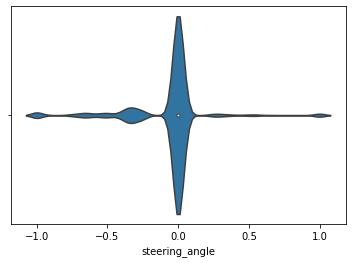

In [ ]:

vplot = sns.violinplot(x=processed_data['steering_angle'])
vplot


In [ ]:
# For future rough works....


## 3.4 Separating each column value in individual dataframes


In [ ]:
center_df = processed_data.center
left_df = processed_data.left
right_df = processed_data.right
values_df = processed_data[['steering_angle','throttle','reverse','speed']]

In [ ]:
plt.imshow(npimg.imread(center_df.iloc[2]))

## 3.5 Pairplot of all the values that are to be predicted


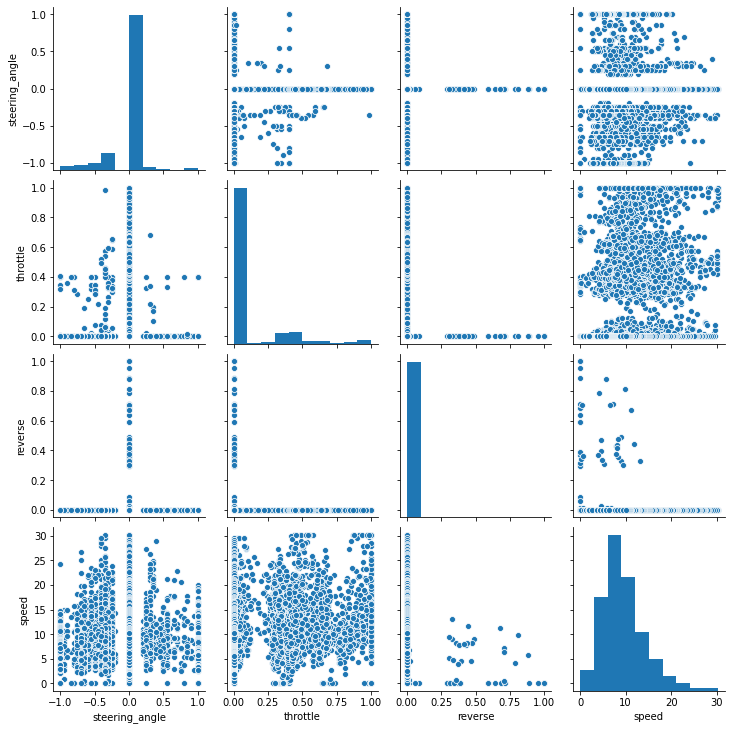

In [ ]:
sns.pairplot(values_df)

## 3.6 Mean and Variance of the values to be predicted


In [ ]:
steer_mean=np.mean(values_df['steering_angle'])
throttle_mean=np.mean(values_df['throttle'])
speed_mean=np.mean(values_df['speed'])
reverse_mean=np.mean(values_df['reverse'])
steer_var=np.var(values_df['steering_angle'])
throttle_var=np.var(values_df['throttle'])
speed_var=np.var(values_df['speed'])
reverse_var=np.var(values_df['reverse'])

## 3.7 RMSE of the values to be predicted

#### As this is a regression problem , with images as the imput and some real values as the output, we have tried to fine the threshold of RMSE for prediction of each values.
 

#### 1.We need to get our RMSE value significantly less than 0.257 in case of steering angle.






In [ ]:
steer_rmse1=sqrt(np.mean(np.square(values_df['steering_angle']-steer_mean)))
steer_rmse2=sqrt(np.mean(np.square(values_df['steering_angle']-0.0)))

print(steer_rmse1)
print(steer_rmse2)

0.25731551606217046
0.2647110578833937


#### 2.We need to get our RMSE value significantly less than 0.217 in case of throttle

In [ ]:
throt_rmse1=sqrt(np.mean(np.square(values_df['throttle']-throttle_mean)))
throt_rmse2=sqrt(np.mean(np.square(values_df['throttle']-0.0)))

print(throt_rmse1)
print(throt_rmse2)

0.21736443809964645
0.23802179598470066


#### 3.We need to get our RMSE value significantly less than 4.84 in case of speed


In [ ]:
speed_rmse1=sqrt(np.mean(np.square(values_df['speed']-speed_mean)))
speed_rmse2=sqrt(np.mean(np.square(values_df['speed']-9)))
print(speed_rmse1)
print(speed_rmse2)

4.845916873227165
4.869164752895892


#### 4.We need to get our RMSE value significantly less than 0.0496 in case of reverse


In [ ]:
rev_rmse1=sqrt(np.mean(np.square(values_df['reverse']-reverse_mean)))
rev_rmse2=sqrt(np.mean(np.square(values_df['reverse']-0.0)))

print(rev_rmse1)
print(rev_rmse2)

0.04963635260628788
0.04973156479969129


## 3.8.Normalization of the values to be predicted and converting them to numpy array

In [ ]:
if not os.path.isfile('/content/drive/My Drive/steer.txt' or '/content/drive/My Drive/throttle.txt' or '/content/drive/My Drive/speed.txt' or '/content/drive/My Drive/reverse.txt'):
  
  y_sc_steer = preprocessing.scale(values_df['steering_angle'])
  y_sc_throttle = preprocessing.scale(values_df['throttle'])
  y_sc_speed = preprocessing.scale(values_df['speed'])
  y_sc_rev = preprocessing.scale(values_df['reverse'])
  print(y_sc_steer)
  print(y_sc_throttle)
  print(y_sc_speed)
  print(y_sc_rev)
  np.savetxt('/content/drive/My Drive/steer.txt', y_sc_steer, delimiter=',') 
  np.savetxt('/content/drive/My Drive/throttle.txt', y_sc_throttle, delimiter=',') 
  np.savetxt('/content/drive/My Drive/speed.txt', y_sc_speed, delimiter=',') 
  np.savetxt('/content/drive/My Drive/reverse.txt', y_sc_rev, delimiter=',') 
y_sc_steer=np.loadtxt('/content/drive/My Drive/steer.txt')
y_sc_throttle=np.loadtxt('/content/drive/My Drive/throttle.txt')
y_sc_speed=np.loadtxt('/content/drive/My Drive/speed.txt')
y_sc_reverse=np.loadtxt('/content/drive/My Drive/reverse.txt')


## 3.9 Converting the image paths to numpy array


In [ ]:
if not os.path.isfile('/content/drive/My Drive/center.npy' or '/content/drive/My Drive/left.npy' or '/content/drive/My Drive/right.npy' ):

  center_array = np.array(center_df)
  left_array = np.array(left_df)
  right_array = np.array(right_df)
  np.save('/content/drive/My Drive/center.npy', center_array) 
  np.save('/content/drive/My Drive/left.npy', left_array) 
  np.save('/content/drive/My Drive/right.npy', right_array) 
center_array=np.load('/content/drive/My Drive/center.npy',allow_pickle=True)
left_array=np.load('/content/drive/My Drive/left.npy',allow_pickle=True)
right_array=np.load('/content/drive/My Drive/right.npy',allow_pickle=True)


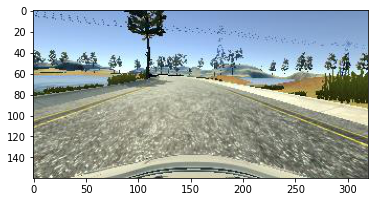

In [ ]:
plt.imshow(npimg.imread(center_array[335]))

# 4.Image Preprocessing

#### 4.1 Image is resized to get only the necessary details.



#### 4.2 Image is converted to Grayscale Image.

#### 4.3 Canny Edge Transformation is performed on the image.

In [ ]:
from scipy import ndimage as ndi
from skimage import color
from skimage import feature

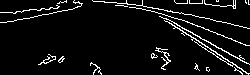

 Image Shape : (75, 250) 
 Image Type : <class 'numpy.ndarray'>
19.33842396736145


In [ ]:

def Transform(path , showImageDetails= False):  #showImageDetails is optional and set to True only for some examples we want to view
  start_time = time.time()
  sigma=0.45

  image = npimg.imread(path)
  image = image[60:135,0:250,:]

  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (3, 3), 0)
  
  v = np.median(blurred)
  lower = int(max(0,(1.0-sigma)*v))
  upper =  int(min(255, (1+sigma)*v))
	
  
  img = cv2.Canny(blurred, lower, upper,L2gradient=True)
 # _ ,img = cv2.threshold(img,128,255,cv2.THRESH_OTSU)
  if showImageDetails:
    show(img)
    print(" Image Shape : {} ".format(img.shape))
    print(" Image Type : {}".format(type(img)))
  end_time = time.time()
  print(end_time-start_time)

  return img


sample = Transform(center_array[255], True)



 ** This function is a modified and compact implementation of the above transformations , using OpenCV libraries
 **

*   GrayScale  conversion completed and verified using cv2
*   Canny Edge transformation of OpenCV lib is used over SKlearn although both have the same nature of outputs but here are some differences :

1.   Canny of cv2 gives output (unnormalized) in the form 0/255 whereas Canny in SKLearn.features giving the same in True/False boolean
2.   After normalization the o/p from cv2 is completely b/w with values either 0 or 1 wheras we are getting some real values for sklearn implementation

Results of the same are given in subsequent cells

The Output of this Transformation is a 75x250 Black and White image 





In [ ]:

print(" Space ocuupied by a single original image : {} Kbytes".format(object_space(center_array[255])/1024))
print(" Space ocuupied by a single transformed image : {} Kbytes".format(object_space(sample)/1024))


 Space ocuupied by a single original image : 0.115234375 Kbytes
 Space ocuupied by a single transformed image : 18.419921875 Kbytes


#  5. Train and Test Split 

## 5.1 Train Percent=80% Test Percent = 20%


In [ ]:
num_examples = 14492 # Because we have total 14492 examples and each of center,left , right has 14492 examples only
train_percent= 0.8
test_percent = 0.2

print(num_examples)

14492


## 5.2  As the data is temporal , so we take first 80% data as train data and remaining 20 % as test data .

In [ ]:
train_center = center_array[:int(num_examples*train_percent)]
test_center  = center_array[-int(num_examples * test_percent):]



In [ ]:
train_left = left_array[:int(num_examples*train_percent)]
test_left  = left_array[-int(num_examples * test_percent):]



In [ ]:
train_right = right_array[:int(num_examples*train_percent)]
test_right  = right_array[-int(num_examples * test_percent):]



In [ ]:
if not os.path.isfile('/content/drive/My Drive/proc_tr_center.npy' or '/content/drive/My Drive/proc_tst_center.npy'):
  proc_tr_center = [Transform(train_center[k]) for k in range(0,len(train_center))]
  proc_tst_center = [Transform(test_center[k]) for k in range(0,len(test_center))]
  np.save('/content/drive/My Drive/proc_tr_center.npy', proc_tr_center) 
  np.save('/content/drive/My Drive/proc_tst_center.npy', proc_tst_center) 
#proc_tr_left = train_left.apply(Transform)
#proc_tr_right = train_right.apply(Transform)


Streaming output truncated to the last 5000 lines.
0.0059070587158203125
0.005631923675537109
0.00547027587890625
0.0060427188873291016
0.005862236022949219
0.0059223175048828125
0.006184577941894531
0.005643606185913086
0.005689144134521484
0.005545616149902344
0.005676746368408203
0.0058362483978271484
0.006013154983520508
0.0057828426361083984
0.005759716033935547
0.006079435348510742
0.005913734436035156
0.006020069122314453
0.005519866943359375
0.005909919738769531
0.006138324737548828
0.005990028381347656
0.0059282779693603516
0.00584101676940918
0.005713224411010742
0.009618043899536133
0.005679130554199219
0.005586862564086914
0.005479574203491211
0.005923032760620117
0.005575656890869141
0.0060634613037109375
0.005884647369384766
0.006144285202026367
0.005864143371582031
0.0057070255279541016
0.005956411361694336
0.005892276763916016
0.005677938461303711
0.006190776824951172
0.005930423736572266
0.00589442253112793
0.006371259689331055
0.0061113834381103516
0.00641965866088867

**The above cell executed in just 19 secs ***

In [ ]:
proc_tst_right = [Transform(test_right[k]) for k in range(0,len(test_right))]
np.save('/content/drive/My Drive/proc_tst_right.npy', proc_tst_right) 


0.013134956359863281
0.005812168121337891
0.005599260330200195
0.005162477493286133
0.0060825347900390625
0.005672931671142578
0.005461931228637695
0.005883455276489258
0.0056421756744384766
0.0059468746185302734
0.00530552864074707
0.005137443542480469
0.005665779113769531
0.0052852630615234375
0.005659341812133789
0.005529642105102539
0.004937410354614258
0.0055332183837890625
0.005478620529174805
0.00484776496887207
0.0050694942474365234
0.005513191223144531
0.005220174789428711
0.0050296783447265625
0.004993438720703125
0.0052607059478759766
0.00553441047668457
0.005247592926025391
0.0054895877838134766
0.0049436092376708984
0.0046002864837646484
0.00502324104309082
0.008473873138427734
0.006585836410522461
0.006485462188720703
0.0048105716705322266
0.0077228546142578125
0.005178928375244141
0.00501561164855957
0.00524592399597168
0.0052661895751953125
0.005164623260498047
0.005125999450683594
0.005148887634277344
0.004973411560058594
0.005068540573120117
0.004849672317504883
0.005

In [ ]:
proc_tr_right = [Transform(train_right[k]) for k in range(0,len(train_right))]
np.save('/content/drive/My Drive/proc_tr_right.npy', proc_tr_right) 

Streaming output truncated to the last 5000 lines.
0.5190682411193848
0.3012702465057373
0.3419029712677002
0.34389686584472656
0.3227503299713135
0.32807183265686035
0.29058384895324707
0.33942437171936035
0.3510324954986572
0.3636641502380371
0.30347490310668945
0.32659077644348145
0.3177452087402344
0.3284320831298828
0.3412790298461914
0.34218454360961914
0.31705427169799805
0.3079233169555664
0.2981572151184082
0.2999844551086426
0.3863074779510498
0.3211851119995117
0.36451029777526855
0.3074464797973633
0.29517531394958496
0.30786728858947754
0.30819225311279297
0.3016083240509033
0.3381845951080322
0.3582489490509033
0.29802536964416504
0.3292422294616699
0.30816078186035156
0.32266998291015625
0.3111867904663086
0.32469868659973145
0.3553497791290283
0.3304920196533203
0.3259775638580322
0.3076820373535156
0.2954854965209961
0.38764500617980957
0.3494760990142822
0.3349742889404297
0.3289620876312256
0.3275463581085205
0.3137168884277344
0.38280320167541504
0.31498050689697266

In [ ]:
if not os.path.isfile('/content/drive/My Drive/proc_tr_left.npy' or '/content/drive/My Drive/proc_tst_left.npy'):
  proc_tr_left = [Transform(train_left[k]) for k in range(0,len(train_left))]
  proc_tst_left = [Transform(test_left[k]) for k in range(0,len(test_left))]
  np.save('/content/drive/My Drive/proc_tr_left.npy', proc_tr_left)
  np.save('/content/drive/My Drive/proc_tst_left.npy', proc_tst_left)

Streaming output truncated to the last 5000 lines.
0.43865323066711426
0.4354114532470703
0.42603397369384766
0.3425099849700928
0.4762613773345947
0.30215024948120117
0.49503564834594727
0.4480862617492676
0.4057760238647461
0.4400632381439209
0.48517799377441406
0.5004894733428955
0.527836799621582
0.4396474361419678
0.4535562992095947
0.5293967723846436
0.44657015800476074
0.49615931510925293
4.52414083480835
0.5126848220825195
0.46561098098754883
0.4236578941345215
0.5934922695159912
0.6103527545928955
0.7585813999176025
0.5286831855773926
0.47843170166015625
0.4788045883178711
0.28869152069091797
0.3521127700805664
0.5111846923828125
0.32962656021118164
0.4649546146392822
0.4840226173400879
0.6327762603759766
0.479353666305542
0.4478483200073242
0.4084925651550293
0.5017364025115967
0.40792131423950195
0.4416086673736572
0.4553256034851074
0.5777771472930908
0.4431760311126709
0.4523890018463135
0.42715001106262207
0.46393537521362305
0.4606747627258301
0.3312368392944336
0.555201

In [ ]:
proc_tr_left=np.load("/content/drive/My Drive/proc_tr_left.npy",allow_pickle=True)
proc_tr_center=np.load("/content/drive/My Drive/proc_tr_center.npy",allow_pickle=True)
proc_tr_right=np.load("/content/drive/My Drive/proc_tr_right.npy",allow_pickle=True)
proc_tst_left=np.load("/content/drive/My Drive/proc_tst_left.npy",allow_pickle=True)
proc_tst_center=np.load("/content/drive/My Drive/proc_tst_center.npy",allow_pickle=True)
proc_tst_right=np.load("/content/drive/My Drive/proc_tst_right.npy",allow_pickle=True)

In [ ]:
if not os.path.isfile('/content/drive/My Drive/train_x.npy'):
  train_x=np.stack((proc_tr_left,proc_tr_center,proc_tr_right),axis=1)
  np.save('/content/drive/My Drive/train_x.npy',train_x,allow_pickle=True)
else:
  train_x=np.load('/content/drive/My Drive/train_x.npy',allow_pickle=True)

In [ ]:
if not os.path.isfile('/content/drive/My Drive/test_x.npy'):
  test_x=np.stack((proc_tst_left,proc_tst_center,proc_tst_right),axis=1)
  np.save('/content/drive/My Drive/test_x.npy',test_x,allow_pickle=True)
else:
  test_x=np.load('/content/drive/My Drive/test_x.npy',allow_pickle=True)

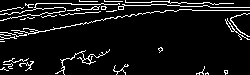

In [ ]:
show(test_x[223][2])

## 5.3 The values that we will predict (steering angle, throttle , reverse and speed ) are divided into train and test values .

In [ ]:
 
 

 
train_steer = y_sc_steer[:int(num_examples * train_percent)]
train_throttle = y_sc_throttle[:int(num_examples * train_percent)]
train_reverse = y_sc_reverse[:int(num_examples * train_percent)]
train_speed = y_sc_speed[:int(num_examples * train_percent)]
 
 
 
 


In [ ]:
if not os.path.isfile('/content/drive/My Drive/train_steer.npy'):
  np.save('/content/drive/My Drive/train_steer.npy',train_steer,allow_pickle=True)
else:
  train_steer=np.load('/content/drive/My Drive/train_steer.npy',allow_pickle=True)

In [ ]:
if not os.path.isfile('/content/drive/My Drive/train_throttle.npy'):
  np.save('/content/drive/My Drive/train_throttle.npy',train_throttle,allow_pickle=True)
else:
  train_throttle=np.load('/content/drive/My Drive/train_throttle.npy',allow_pickle=True)

In [ ]:
if not os.path.isfile('/content/drive/My Drive/train_reverse.npy'):
  np.save('/content/drive/My Drive/train_reverse.npy',train_reverse,allow_pickle=True)
else:
  train_reverse=np.load('/content/drive/My Drive/train_reverse.npy',allow_pickle=True)

In [ ]:
if not os.path.isfile('/content/drive/My Drive/train_speed.npy'):
  np.save('/content/drive/My Drive/train_speed.npy',train_speed,allow_pickle=True)
else:
  train_speed=np.load('/content/drive/My Drive/train_speed.npy',allow_pickle=True)

In [ ]:


test_steer = y_sc_steer[-int(num_examples*test_percent):]
test_throttle = y_sc_throttle[-int(num_examples*test_percent):]
test_reverse = y_sc_reverse[-int(num_examples*test_percent):]
test_speed = y_sc_speed[-int(num_examples*test_percent):]



In [ ]:
if not os.path.isfile('/content/drive/My Drive/test_steer.npy'):
  np.save('/content/drive/My Drive/test_steer.npy',train_steer,allow_pickle=True)
else:
  test_steer=np.load('/content/drive/My Drive/test_steer.npy',allow_pickle=True)

In [ ]:
if not os.path.isfile('/content/drive/My Drive/test_throttle.npy'):
  np.save('/content/drive/My Drive/test_throttle.npy',test_throttle,allow_pickle=True)
else:
  test_throttle=np.load('/content/drive/My Drive/train_throttle.npy',allow_pickle=True)

In [ ]:
if not os.path.isfile('/content/drive/My Drive/test_reverse.npy'):
  np.save('/content/drive/My Drive/train_reverse.npy',test_reverse,allow_pickle=True)
else:
  test_reverse=np.load('/content/drive/My Drive/test_reverse.npy',allow_pickle=True)

In [ ]:
if not os.path.isfile('/content/drive/My Drive/test_speed.npy'):
  np.save('/content/drive/My Drive/test_speed.npy',test_speed,allow_pickle=True)
else:
  test_speed=np.load('/content/drive/My Drive/test_speed.npy',allow_pickle=True)

### 5.3.1 Distribution of Train and Test Steering angles.



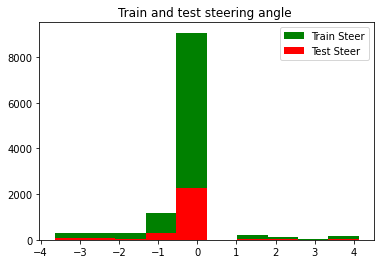

In [ ]:
plt.hist(train_steer,color='green',label="Train Steer")
plt.hist(test_steer,color='red',label="Test Steer")
plt.title("Train and test steering angle ")
plt.legend()
plt.show()



In [ ]:

train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],75,250,1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],75,250,1)


# 6.Final Data Creation

## 6.1 One image is randomly selected from each row of left , right and center array and added to the final data.

In [ ]:
def choose_image(data,index):
    """
    Randomly choose an image from the center, left or right, and adjust
    the steering angle.
    """
    choice = np.random.choice(3)
    if choice == 0:
        return data[index,0,:,:]
    elif choice == 1:
        return data[index,1,:,:]
    return data[index,2,:,:]

In [ ]:
def data_creator(train_x):
    """
    Generate training image give image paths and associated steering angles
    """
    images = np.empty([len(train_x), 75, 250,1])
      
    while True:
        
        for index in range(0,len(train_x)):
          images[index]=choose_image(train_x,index)
            
            
        return images


In [ ]:
final_train=data_creator(train_x)
final_test=data_creator(test_x)

# 7. Densenet Model

In [ ]:
def ReLU(x):
  return x*(x>0)
def bn_rel_conv(x1 , fil=32 , k=1,s=1):
  x1= BatchNormalization()(x1)
  x1= Conv2D(fil,kernel_size = k, strides=s,activation ='relu',padding='same')(x1)
  return x1
def transition_layer(x2):
  x2 = bn_rel_conv(x2, K.int_shape(x2)[-1]//2)
  x2 = AveragePooling2D(2,strides=2)(x2)
  return x2
'''
def dense_block(x3 , rep):
  f = 32
  temp = x3
  for _ in range(rep):
    y = bn_rel_conv(x3, fil = 4*f)
    y = bn_rel_conv(y,fil = f,k=3) 
    temp = Concatenate()([y, x3])
  return temp
  '''

'\ndef dense_block(x3 , rep):\n  f = 32\n  temp = x3\n  for _ in range(rep):\n    y = bn_rel_conv(x3, fil = 4*f)\n    y = bn_rel_conv(y,fil = f,k=3) \n    temp = Concatenate()([y, x3])\n  return temp\n  '

## 7.1 Definition of the Model

In [ ]:
 # Densenet 

def Densenet(input_shape):
  inp = Input(input_shape) 
  x = Conv2D(16,kernel_size=(5,5),strides=(1,1),padding='same', input_shape = input_shape)(inp)
  #x = MaxPooling2D(3,strides=2,padding='same')(x)
  #1st Block
  y11 = bn_rel_conv(x,fil=12,k=5)
  y21 = bn_rel_conv(y11,fil=12,k=5)
  y21_cat = Concatenate()([y21,y11])
  y31 = bn_rel_conv(y21_cat,fil=12,k=5)
  y31_cat = Concatenate()([y31,y21_cat])
  
  t1 = bn_rel_conv(y31_cat,fil=16)
  t1 = AveragePooling2D(pool_size=(2,2),strides=2)(t1)

  #2nd Block
  y12 = bn_rel_conv(t1,fil=12,k=5)
  y22 = bn_rel_conv(y12,fil=12,k=5)
  y22_cat = Concatenate()([y22,y12])
  y32 = bn_rel_conv(y22_cat,fil=12,k=5)
  y32_cat = Concatenate()([y32,y22_cat])

  #output = GlobalAveragePooling2D(data_format='channels_last')(y32_cat)
  #output = Conv2D(18,kernel_size=(5,5),strides=2,activation='relu')(y32_cat)
  #output = Conv2D(9,kernel_size=(3,3),strides=2,activation='relu')(output)
  output = bn_rel_conv(y32_cat,fil=18,k=5,s=2)
  output = bn_rel_conv(output,fil=9,k=5,s=2)
  #output = bn_rel_conv(output,fil=9,k=5,s=1)
  output = bn_rel_conv(output,fil=9,k=3,s=1)
  output = Dropout(0.5)(output)
  output = Flatten()(output) 

  #output = Dense(10,activation='elu')(output)
  #output = Dense(500,activation='relu')(output)
  #output = Dense(1000,activation='relu')(output)
  #output = Dense(500,activation='relu')(output)
  
  output = Dense(100,activation='relu')(output)
  output = Dense(50,activation='relu')(output)
  output = Dense(10,activation='relu')(output)
  output = Dense(1)(output)
  #output = output.view(output.shape[0],-1)
  model = Model(inputs = inp,outputs = output, name = 'Aloonet')
  return model

'''  #1st Transition
  
  #2nd Transition
  t2 = bn_rel_conv(y32_cat,fil=16)
  t2 = AveragePooling2D(pool_size=(2,2),strides=2)(t2)
  
  #3rd Block
  y13 = bn_rel_conv(t2,fil=12,k=5)
  y23 = bn_rel_conv(y13,fil=12,k=5)
  y23_cat = Concatenate()([y23,y13])
  y33 = bn_rel_conv(y23_cat,fil=12,k=5)
  y33_cat = Concatenate()([y33,y23_cat]) '''
  
 



   



  


'  #1st Transition\n  \n  #2nd Transition\n  t2 = bn_rel_conv(y32_cat,fil=16)\n  t2 = AveragePooling2D(pool_size=(2,2),strides=2)(t2)\n  \n  #3rd Block\n  y13 = bn_rel_conv(t2,fil=12,k=5)\n  y23 = bn_rel_conv(y13,fil=12,k=5)\n  y23_cat = Concatenate()([y23,y13])\n  y33 = bn_rel_conv(y23_cat,fil=12,k=5)\n  y33_cat = Concatenate()([y33,y23_cat]) '

## 7.2 Model Summary

In [ ]:
input_shape = (75,250,1)

model = Densenet(input_shape=input_shape)
model.summary()

Model: "Aloonet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 75, 250, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 75, 250, 16)  416         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 75, 250, 16)  64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 75, 250, 12)  4812        batch_normalization_1[0][0]      
____________________________________________________________________________________________

## 7.3 Model Visualisation

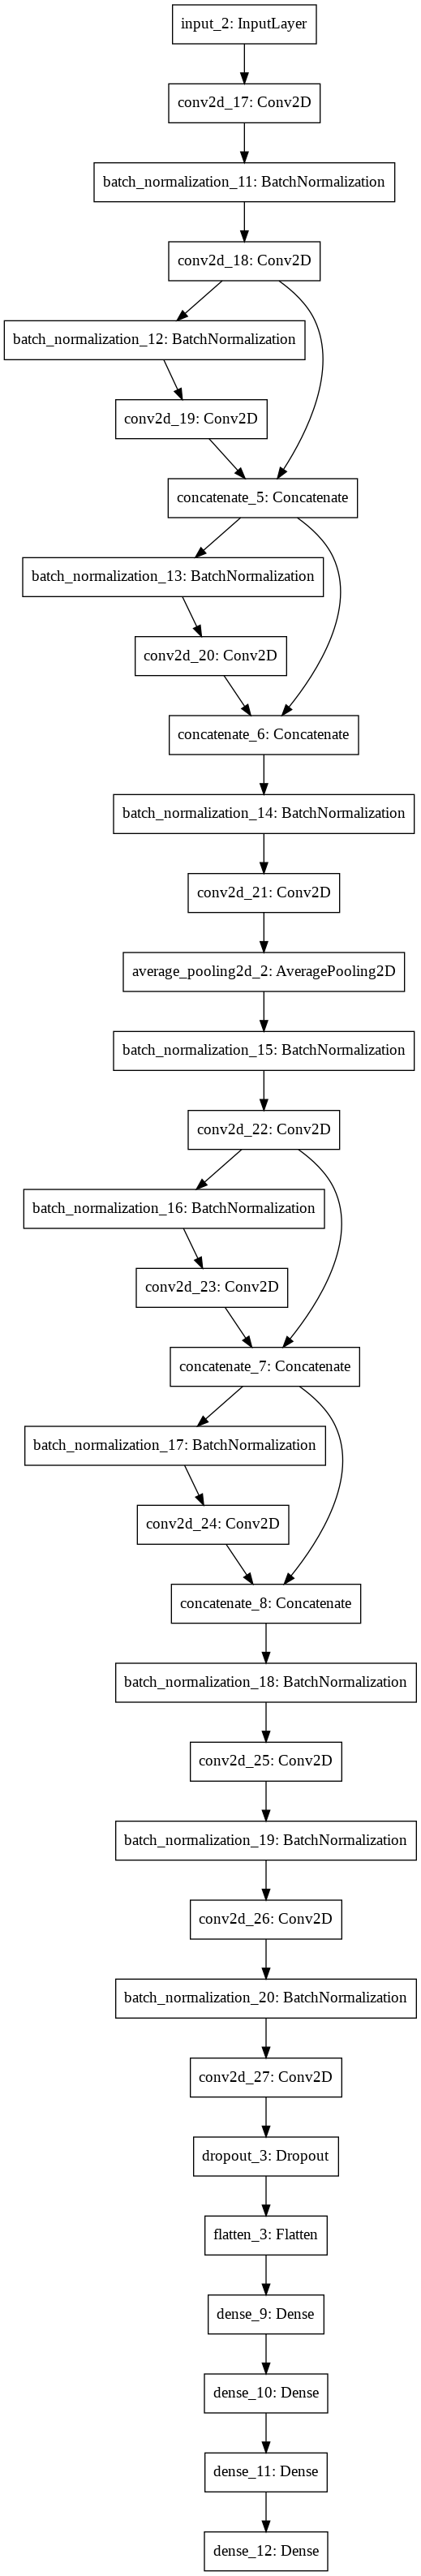

In [ ]:
from keras.utils import plot_model
plot_model(Densenet(input_shape=input_shape),to_file='/content/drive/My Drive/Densenet.png')

## 7.4 Compilation and Execution of the model

In [ ]:

adam = keras.optimizers.Adam(lr=1e-4)
model.compile(loss='mean_squared_error',optimizer = adam,metrics=['accuracy'])


In [ ]:
history = model.fit(final_train ,train_steer, batch_size=64, epochs=10,validation_data=(final_test,test_steer))

Train on 11593 samples, validate on 2898 samples
Epoch 1/10
11593/11593 [==============================] - 125s 11ms/step - loss: 1.0726 - accuracy: 0.0000e+00 - val_loss: 1.0245 - val_accuracy: 0.0000e+00
Epoch 2/10
11593/11593 [==============================] - 113s 10ms/step - loss: 0.9623 - accuracy: 0.0000e+00 - val_loss: 0.9740 - val_accuracy: 0.0000e+00
Epoch 3/10
11593/11593 [==============================] - 113s 10ms/step - loss: 0.9253 - accuracy: 0.0000e+00 - val_loss: 0.9186 - val_accuracy: 0.0000e+00
Epoch 4/10
11593/11593 [==============================] - 113s 10ms/step - loss: 0.8891 - accuracy: 0.0000e+00 - val_loss: 0.9070 - val_accuracy: 0.0000e+00
Epoch 5/10
11593/11593 [==============================] - 113s 10ms/step - loss: 0.8509 - accuracy: 0.0000e+00 - val_loss: 0.8699 - val_accuracy: 0.0000e+00
Epoch 6/10
11593/11593 [==============================] - 113s 10ms/step - loss: 0.8296 - accuracy: 0.0000e+00 - val_loss: 0.8702 - val_accuracy: 0.0000e+00
Epoch 7/1

In [ ]:
model_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
json_file = open('/content/drive/My Drive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error',optimizer = adam,metrics=['accuracy'])


## 7.5 Results of the Model

### 7.5.1 Train and Test Loss

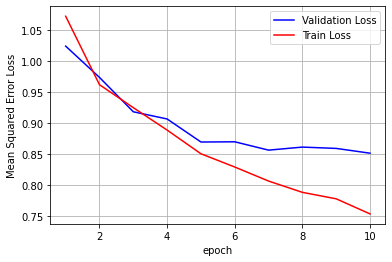

In [ ]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ;
ax.set_ylabel('Mean Squared Error Loss')


# list of epoch numbers
x = list(range(1,11))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#Image('my_figure.png')

In [ ]:
steer_val = model.predict(final_test) # 1000 or as per the requirements
real_steer = steer_val*steer_var + steer_mean
teststeer2= test_steer*steer_var+steer_mean




### 7.5.2 Distribution of Predicted and actual values

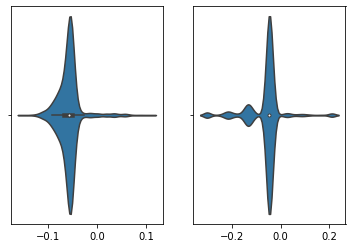

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(6,4))
sns.violinplot(x=real_steer,ax=ax[0])
sns.violinplot(x=teststeer2,ax=ax[1])
fig.show()


### 7.5.3 Accuracy of thhe predicted values .

In [ ]:
y = teststeer2 

s1 = 0
for i in range(len(final_test)):
  if abs(real_steer[i]-y[i]) <= 0.1 :
    s1 = s1+1
print("Accuracy is : ",((s1/len(final_test))*100)) 


Accuracy is :  90.37267080745342


In [ ]:
!pip install sk-video

     |████████████████████████████████| 2.3MB 5.0MB/s 


## 7.6 Visualisation of predicted values

In [ ]:
import scipy
import numpy as np
from google.colab.patches import cv2_imshow as show
from subprocess import call
from IPython.display import clear_output
import skvideo.io
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
img = cv2.imread('/content/drive/My Drive/steering_wheel_image.jpg',0)
rows,cols = img.shape





radians=real_steer
degrees=radians*180/scipy.pi
final_image=[]
for i in range(0,len(test_steer)):
  print(i)
  image = npimg.imread(center_array[i+int(0.8*len(center_array))+1])
  proc_image = proc_tst_center[i]
  h1, w1 = image.shape[:2]
  h2, w2 = proc_image.shape[:2]
  proc_image= proc_image.reshape(proc_image.shape[0],proc_image.shape[1],1)
  M= cv2.getRotationMatrix2D((cols/2,rows/2),-degrees[i],1)
  dst = cv2.warpAffine(img,M,(cols,rows))
  h3, w3 = dst.shape[:2]
  dst= dst.reshape(dst.shape[0],dst.shape[1],1)
  vis = np.zeros((max(h1, h2,h3), w1+w2+w3,3), np.uint8)
  vis[:h1, :w1,:3] = image
  vis[:h2, w1:w1+w2] = proc_image
  vis[:h3, w1+w2:w1+w2+w3] = dst
  
  final_image.append(vis)
skvideo.io.vwrite("/content/drive/My Drive/final_video.mp4", final_image)  
  
cv2.destroyAllWindows()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
pred_steer_rmse=sqrt(np.mean(np.square(real_steer-np.mean(real_steer))))
actual_steer_rmse=sqrt(np.mean(np.square(teststeer2-np.mean(teststeer2))))

print(pred_steer_rmse)
print(actual_steer_rmse)

0.024533627510272302
0.0673707714682352


In [ ]:


nvidia = Sequential()
#Sirajnet.add(Lambda(lambda x: x/127.5-1.0, input_shape=(75,250,1)))
nvidia.add(Conv2D(24, 5, 5, activation='elu', subsample=(2, 2),input_shape=(75,250,1)))
nvidia.add(Conv2D(36, 5, 5, activation='elu', subsample=(2, 2)))
nvidia.add(Conv2D(48, 5, 5, activation='elu', subsample=(2, 2)))
nvidia.add(Conv2D(64, 3, 3, activation='elu'))
nvidia.add(Conv2D(64, 3, 3, activation='elu'))
nvidia.add(Dropout(0.5))
nvidia.add(Flatten())
nvidia.add(Dense(100, activation='elu'))
nvidia.add(Dense(50, activation='elu'))
nvidia.add(Dense(10, activation='elu'))
nvidia.add(Dense(1))

nvidia.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 36, 123, 24)       624       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 60, 36)        21636     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 28, 48)         43248     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 26, 64)         27712     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 24, 64)         36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 24, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="elu", input_shape=(75, 250, ..., strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  if __name__ == '__main__':


In [ ]:

adam = keras.optimizers.Adam(lr=1e-4)
nvidia.compile(loss='mean_squared_error',optimizer = adam,metrics=['accuracy'])


In [ ]:
history2 = nvidia.fit(final_train ,train_steer, batch_size=64, epochs=10,validation_data=(final_test,test_steer))

Train on 11593 samples, validate on 2898 samples
Epoch 1/10
11593/11593 [==============================] - 8s 670us/step - loss: 1.1905 - accuracy: 0.0000e+00 - val_loss: 1.0204 - val_accuracy: 0.0000e+00
Epoch 2/10
11593/11593 [==============================] - 7s 605us/step - loss: 0.9666 - accuracy: 0.0000e+00 - val_loss: 0.9896 - val_accuracy: 0.0000e+00
Epoch 3/10
11593/11593 [==============================] - 7s 604us/step - loss: 0.9222 - accuracy: 0.0000e+00 - val_loss: 0.9161 - val_accuracy: 0.0000e+00
Epoch 4/10
11593/11593 [==============================] - 7s 603us/step - loss: 0.8752 - accuracy: 0.0000e+00 - val_loss: 0.8794 - val_accuracy: 0.0000e+00
Epoch 5/10
11593/11593 [==============================] - 7s 607us/step - loss: 0.8348 - accuracy: 0.0000e+00 - val_loss: 0.8794 - val_accuracy: 0.0000e+00
Epoch 6/10
11593/11593 [==============================] - 7s 611us/step - loss: 0.7904 - accuracy: 0.0000e+00 - val_loss: 0.8857 - val_accuracy: 0.0000e+00
Epoch 7/10
1159

In [ ]:
model_json = nvidia.to_json()
with open("/content/drive/My Drive/nvidia_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
nvidia.save_weights("/content/drive/My Drive/nvidia_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
json_file = open('/content/drive/My Drive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error',optimizer = adam,metrics=['accuracy'])


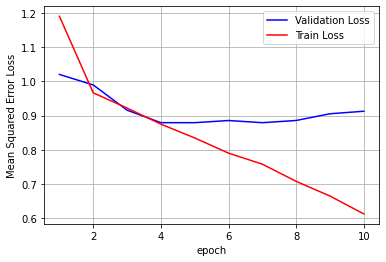

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ;
ax.set_ylabel('Mean Squared Error Loss')


# list of epoch numbers
x = list(range(1,11))
vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)


In [ ]:
nv_steer_val = nvidia.predict(final_test) # 1000 or as per the requirements
nv_steer = nv_steer_val*steer_var + steer_mean





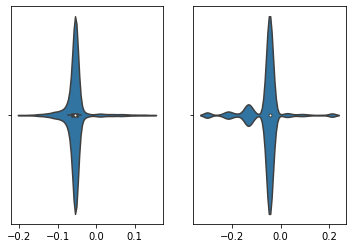

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(6,4))
sns.violinplot(x=nv_steer,ax=ax[0])
sns.violinplot(x=teststeer2,ax=ax[1])
fig.show()


In [ ]:
y = teststeer2 

s1 = 0
for i in range(len(final_test)):
  if abs(nv_steer[i]-y[i]) <= 0.1 :
    s1 = s1+1
print("Accuracy is : ",((s1/len(final_test))*100)) 


Accuracy is :  89.3719806763285


In [ ]:
pred_nv_steer_rmse=sqrt(np.mean(np.square(nv_steer-np.mean(nv_steer))))
actual_steer_rmse=sqrt(np.mean(np.square(teststeer2-np.mean(teststeer2))))

print(pred_nv_steer_rmse)
print(actual_steer_rmse)

0.030785709252646648
0.0673707714682352
